<a href="https://colab.research.google.com/github/Anshul007/Analysis_in_Clustering/blob/testing/Clustering_Analysis_using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

[here](https://github.com/royjafari/DataAnalyticsForFun/blob/main/Clustering%20Analysis%20-%20KMeans/K-Means%20-%20E.ipynb)

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

# Importing Data

In [3]:
# importing data from github
url = "https://raw.githubusercontent.com/royjafari/DataAnalyticsForFun/main/Clustering%20Analysis%20-%20KMeans/WH%20Report_preprocessed.csv"
df = pd.read_csv(url) # this data is the preprocessed
df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


# Cleaning the Data

In [4]:
df.columns

Index(['Name', 'Continent', 'year', 'population', 'Life_Ladder',
       'Log_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
       'Generosity', 'Perceptions_of_corruption', 'Positive_affect',
       'Negative_affect'],
      dtype='object')

In [5]:
# Just for clustering purpose we will take the data only from year 2019.
BM = df.year == 2019 # boolean mask
report_df = pd.DataFrame(df[BM]).reset_index(drop= True)

report_df.drop(columns= ["year"], inplace= True) # now we can drop the year column
report_df.set_index("Name", drop= True, inplace= True)
report_df.head()

,Continent,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
Name,,,,,,,,,,,
Afghanistan,Asia,38041754.0,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
Albania,Europe,2854191.0,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274
Algeria,Africa,43053054.0,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215
Argentina,South America,44938712.0,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319
Armenia,Europe,2957731.0,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430


In [6]:
report_df.columns

Index(['Continent', 'population', 'Life_Ladder', 'Log_GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy_at_birth',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect'],
      dtype='object')

In [7]:
# Going further we are selecting only limited columns
Xs = report_df.drop(columns= ['Continent', 'population'])
Xs

,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
Name,,,,,,,,,
Afghanistan,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
Albania,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274
Algeria,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215
Argentina,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319
Armenia,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430
...,...,...,...,...,...,...,...,...,...
Uruguay,6.600,9.979,0.933,69.1,0.903,-0.095,0.599,0.889,0.222
Uzbekistan,6.154,8.853,0.915,65.4,0.970,0.304,0.511,0.845,0.220
Vietnam,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,0.186


In [8]:
Xs.columns

Index(['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
       'Generosity', 'Perceptions_of_corruption', 'Positive_affect',
       'Negative_affect'],
      dtype='object')

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
Xs_transform = scaler.fit_transform(Xs)
df = pd.DataFrame(Xs_transform, columns= Xs.columns, index= Xs.index) # Scaling the data

In [11]:
df.head()

,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
Name,,,,,,,,,
Afghanistan,0.000000,0.156130,0.000000,0.130282,0.015385,0.215709,0.956327,0.050967,1.000000
Albania,0.484736,0.550619,0.473310,0.714789,0.670085,0.226260,0.945129,0.630931,0.373626
Algeria,0.438483,0.506408,0.681495,0.612676,0.000000,0.348183,0.751400,0.462214,0.211538
Argentina,0.686586,0.648014,0.846975,0.714789,0.738462,0.094959,0.851064,0.885764,0.497253
Armenia,0.575948,0.545921,0.644128,0.651408,0.784615,0.140680,0.574468,0.485062,0.802198


In [12]:
df.describe()

,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,0.602234,0.546465,0.708083,0.595561,0.712821,0.321892,0.715474,0.687113,0.414227
std,0.216265,0.246703,0.221818,0.225242,0.202061,0.189017,0.215734,0.198222,0.245573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.470814,0.347982,0.604982,0.431338,0.591026,0.191090,0.648656,0.548770,0.226648
50%,0.634783,0.564289,0.761566,0.649648,0.758120,0.289566,0.772116,0.709139,0.372253
75%,0.752405,0.765859,0.884342,0.747359,0.866239,0.429074,0.868981,0.851054,0.600962
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Clusterability
## Hopkins Statistics

>It is the method to check the clustering tendency for unsupervised machine learning.

In unsupervised machine learning, a big issue is that clustering methods will return clusters even if the data does not contain any clusters.

In [13]:
def validating_By_hopkins_Statistics(data, m):
  
  # importing libraries
  from random import sample
  from pandas import DataFrame
  from numpy import random
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.neighbors import NearestNeighbors

  # taking few meta data
  d = len(data.columns)
  length, col_len = data.shape

  # Scaling the data
  scaler = MinMaxScaler()
  data_scaled = pd.DataFrame(scaler.fit_transform(data), columns= data.columns)

  # creating the random dataset
  knn = NearestNeighbors(n_neighbors=2).fit(df)

  rand_df = DataFrame(random.rand(m,d),index = range(0,m),columns= data.columns)
  rand_df = rand_df*2-1
  rand_df = rand_df * df.abs().max()

  # applying the hopkins approach
  ujd = [] # for the current data
  wjd = [] # for the another (which is similar to the original one) data

  knn = NearestNeighbors(n_neighbors= 2).fit(data_scaled)

  for itr in range(0, m):
    u_dist, _ = knn.kneighbors([rand_df.iloc[itr]]) # Find the K-neighbors of a point
    # u_dist, _ = knn.kneighbors([rand_df.iloc[j]])
    ujd.append(u_dist[0][0])

    wjd, _ = knn.kneighbors(data_scaled.sample(1)) # Find the K-neighbors of a point
    ujd.append(wjd[0][1])
  
  return (sum(ujd) / (sum(ujd) + sum(wjd)))

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# getting the hopkins results
m= 10
validating_By_hopkins_Statistics(df, m)

array([1.        , 0.98642062])

In [16]:
for i in range(0, 10):
  print(validating_By_hopkins_Statistics(Xs, m))

[1.        0.9853269]
[1.         0.98259034]
[1.         0.98098335]
[1.        0.9875054]
[1.         0.98372543]
[1.         0.98272122]
[1.         0.98553564]
[1.         0.98619368]
[1.         0.98235231]
[1.         0.98624942]


> this tells there is high tendency that our data is good for clustering nature.

# Applying the K-Mean Clustering Algorithm

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters= 4) # how we decided cluster is still a question
kmeans.fit(df)

# checking which all the contries fall under which cluster
memb = pd.Series(kmeans.labels_, index= df.index)
for key, item in memb.groupby(memb):
  print(key, ": ", ", ".join(item.index))


0 :  Afghanistan, Algeria, Armenia, Bangladesh, Bolivia, Botswana, Gabon, Georgia, Iraq, Jordan, Lebanon, Libya, Montenegro, Morocco, Tunisia, Turkey
1 :  Albania, Argentina, Azerbaijan, Belarus, Belgium, Bosnia and Herzegovina, Brazil, Bulgaria, Chile, China, Colombia, Costa Rica, Croatia, Cyprus, Czech Republic, Dominican Republic, Ecuador, El Salvador, Greece, Guatemala, Honduras, Hungary, Israel, Italy, Japan, Kazakhstan, Kuwait, Latvia, Lithuania, Malaysia, Malta, Mexico, Moldova, Mongolia, Nicaragua, Panama, Paraguay, Peru, Philippines, Poland, Portugal, Romania, Saudi Arabia, Serbia, Slovenia, South Africa, Spain, Sri Lanka, Tajikistan, Thailand, Turkmenistan, Ukraine, Uruguay, Vietnam
2 :  Australia, Austria, Bahrain, Canada, Denmark, Estonia, Finland, France, Germany, Iceland, Ireland, Luxembourg, Netherlands, New Zealand, Norway, Singapore, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States, Uzbekistan
3 :  Benin, Burkina Faso, Cambodia, Cameroon, Chad, 

# Cluster Comparison

In [19]:
def countpairs(Clustering1,Clustering2):
    from pandas import Series
    
    output = Series(0,index=['N00','N01','N10','N11'])

    for i in range(0,10):
        for j in range(0,i):
            if(i!=j):

                c1_same = False
                c2_same = False
                c1_Not_same = False
                c2_Not_same = False

                if(Clustering1[i]==Clustering1[j]):
                    c1_same=True
                else:
                    c1_Not_same=True
                if(Clustering2[i]==Clustering2[j]):
                    c2_same=True
                else:
                    c2_Not_same = True

                if(c1_same & c2_same):
                    output.N11 = output.N11 +1 
                if(c1_Not_same & c2_Not_same):
                    output.N00 = output.N00 +1
                if(c1_same & c2_Not_same):
                    output.N10 = output.N10 +1
                if(c1_Not_same & c2_same):
                    output.N01 = output.N01 +1

    return(output)
'''
Fowlkes–Mallows
'''
def fowlkes_mallows(Clustering1,Clustering2):
    
    from numpy import sqrt
    from pandas import Series
    
    p = countpairs(Clustering1,Clustering2)
    
    return(p.N11/((p.N11+p.N01)+(p.N11+p.N10)))

## Testing the coparison function

In [20]:
Clustering1 = np.random.randint(0, 4, len(df))
Clustering2 = np.random.randint(0, 4, len(df))

fowlkes_mallows(Clustering1,Clustering2)

0.1

In [21]:
for i in range(0, 20):
  print(f"fowlkes_mallows: {fowlkes_mallows(Clustering1, Clustering2)}")
  print("--"*20)

fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_mallows: 0.1
----------------------------------------
fowlkes_

## Measuring the K-Means model consistency

In [22]:
kmeans = KMeans(n_clusters= 4)
Clustering1 = kmeans.fit(df).labels_
Clustering2 = kmeans.fit(df).labels_

In [23]:
fowlkes_mallows(Clustering1, Clustering2)

0.29411764705882354

In [24]:
# checking multiple times
for i in range(0,10):
  print(fowlkes_mallows(Clustering1,Clustering2))

0.29411764705882354
0.29411764705882354
0.29411764705882354
0.29411764705882354
0.29411764705882354
0.29411764705882354
0.29411764705882354
0.29411764705882354
0.29411764705882354
0.29411764705882354


## 1. Find the number of clusters using Sum of Squared Error (SSE)
---

In [25]:
repetition = [f"R{i}" for i in range(2, 20)]
SSE_results = pd.DataFrame(0.0, index= range(1,15), columns= repetition)

In [26]:
for n_cluster in SSE_results.index:
  for col in SSE_results.columns:
    kmean_alg = KMeans(n_clusters=n_cluster).fit(df)
    # Inertia: Sum of distances of samples to their closest cluster center
    SSE_results.at[n_cluster,col] = kmean_alg.inertia_

SSE_results["mean"] = SSE_results[repetition].mean(axis=1) 
SSE_results["var"] = SSE_results[repetition].var(axis=1) 

In [27]:
SSE_results.sort_values(by="mean")

,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,mean,var
14,12.441068,12.122335,12.459465,12.355870,12.417450,12.196759,11.957609,12.252665,12.480763,12.324605,12.364269,12.217994,12.109069,12.496058,12.264200,12.250209,12.430018,12.228503,12.298273,2.168789e-02
13,12.691218,12.947996,12.751116,12.587163,12.921252,12.821813,12.573367,12.955383,12.483905,12.864359,12.750566,12.891422,12.660262,12.731353,12.942903,13.001123,12.565586,12.848840,12.777202,2.470939e-02
12,13.391294,13.158376,13.191665,13.631841,13.257351,13.487538,13.372650,13.270489,13.148472,13.318702,13.288452,13.235033,13.341424,13.314721,13.232370,13.563171,13.508776,13.251963,13.331349,1.911884e-02
11,13.996800,13.830544,13.756912,13.727059,14.024360,13.921571,13.945350,13.855589,14.095891,13.876248,13.938149,13.760274,13.882232,13.884097,13.861656,13.663362,13.620027,13.867857,13.861554,1.501777e-02
10,14.592149,14.629992,14.479016,14.632656,14.582906,14.773358,14.569584,14.550531,14.650738,14.591601,14.731116,14.562381,14.378781,14.561268,14.379221,14.565550,14.395174,14.624906,14.569496,1.163687e-02
9,15.412348,15.566183,15.406686,15.100086,15.379412,15.147447,15.356352,15.346419,15.164191,15.309728,15.428769,15.218557,15.243173,15.159461,15.376571,15.390529,15.135783,15.626299,15.320444,2.202583e-02
8,16.693510,15.995596,16.001500,16.208852,16.217508,16.392044,16.263744,16.061934,15.980726,15.924573,16.086290,16.010187,16.016346,16.124676,16.018788,16.247652,16.265994,16.100305,16.145013,3.484752e-02
7,17.192158,17.161491,17.420330,17.307304,17.182575,17.216488,17.248028,17.208920,17.344342,17.335766,17.245476,17.227400,17.100201,17.163737,17.215643,17.193678,17.225816,17.185121,17.231915,5.927327e-03
6,18.986940,18.615344,18.702610,18.509067,18.560424,18.627262,18.426723,18.589017,18.564746,18.431767,18.763338,18.580680,18.465851,18.522608,18.530485,18.584991,19.115381,18.581405,18.619924,3.209818e-02
5,20.444814,20.364373,20.365742,20.369808,20.350595,20.451128,20.361888,20.419276,20.730267,20.357822,20.374503,20.434035,20.351291,20.850657,20.374503,20.422507,20.486818,20.442429,20.441803,1.820053e-02


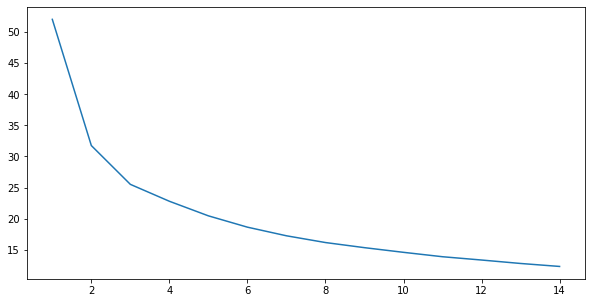

In [28]:
# let's plot to get the meaningfull insights
plt.figure(figsize=(10,5))
SSE_results["mean"].plot()
plt.show()

## 1. Find the number of clusters using Silhouette Score
---

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
kmean_alg = KMeans(n_clusters= 3).fit(df)
slht_s = silhouette_score(df, kmean_alg.labels_)
slht_s

0.26549546649415323

In [31]:
repetition = [f"R{i}" for i in range(2, 20)]
SIL_results = pd.DataFrame(0.0, index= range(1,15), columns= repetition)

for n_cluster in SIL_results.index:
  for col in SIL_results.columns:
    kmean_alg = KMeans(n_clusters=n_cluster).fit(df)
    # Inertia: Sum of distances of samples to their closest cluster center
    # SSE_results.at[n_cluster,col] = kmean_alg.inertia_ # for SSE
    SIL_results.at[n_cluster,col] = kmean_alg.inertia_ # for silhouette_score

SIL_results["mean"] = SIL_results[repetition].mean(axis=1) 
SIL_results["var"] = SIL_results[repetition].var(axis=1) 

In [32]:
SIL_results.sort_values("mean", ascending= False)

,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,mean,var
1,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,52.062049,5.345693e-29
2,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,31.752188,1.336423e-29
3,25.502080,25.513000,25.502080,25.506257,25.502080,25.530496,25.530496,25.502080,25.502080,25.502080,25.530496,25.502080,25.502080,25.513000,25.502080,25.502080,25.502080,25.522452,25.509393,1.253323e-04
4,22.968777,22.909726,22.953407,22.752482,22.848067,22.911070,22.721049,22.688506,22.681289,22.700410,22.815306,22.673684,22.968777,22.881506,22.881506,22.688506,22.720791,22.875598,22.813359,1.192990e-02
5,20.511455,20.427704,20.487901,20.426682,20.455214,20.444814,20.585720,20.364373,20.376084,20.541142,20.426682,20.442429,20.443265,20.405996,20.357822,20.696684,20.357822,20.494195,20.458110,7.472299e-03
6,18.743658,18.425216,18.514612,18.801341,18.709745,18.689480,18.790226,18.664621,18.632410,18.431767,18.720269,18.602714,18.558887,18.681711,18.485932,18.840609,18.440867,18.508569,18.624591,1.796018e-02
7,17.170870,17.168001,17.367672,17.362464,17.194333,17.324861,17.054465,17.379408,17.480734,17.174576,17.145209,17.283667,17.341307,17.177614,17.155907,17.315295,17.517010,17.758455,17.298436,2.873474e-02
8,16.092118,16.000705,16.267316,16.124611,16.014942,15.961998,15.955345,16.406738,15.975838,16.264644,15.921972,15.936983,16.036602,16.193477,15.916347,16.127972,16.057541,16.013582,16.070485,1.890979e-02
9,15.208885,15.109459,15.136755,15.436042,15.231689,15.402494,15.203662,15.208064,15.577841,15.163311,15.448735,15.368190,15.270883,15.280578,15.859864,15.255251,15.133306,15.626746,15.328986,4.008361e-02
10,14.748060,14.447861,14.448969,14.322078,14.256730,14.638050,14.426942,14.708925,14.328897,14.642508,14.349381,14.703482,14.481974,14.612595,14.408393,14.409830,14.602010,14.472966,14.500536,2.235709e-02


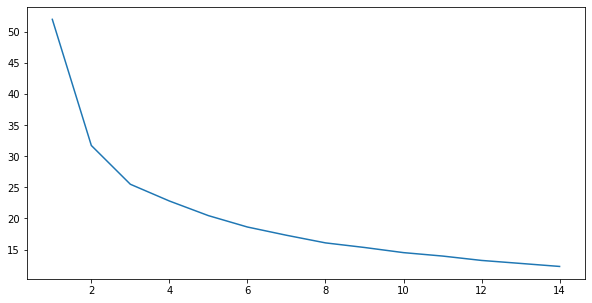

In [33]:
plt.figure(figsize= (10,5))
SIL_results["mean"].plot()
plt.show()

In [34]:
for i in range(0,10):
    Clustering1 = KMeans(n_clusters=3).fit(df).labels_
    Clustering2 = KMeans(n_clusters=3).fit(df).labels_
    
    print(f'fowlkes_mallows: {fowlkes_mallows(Clustering1,Clustering2)}')
    print('----------------')

fowlkes_mallows: 0.38461538461538464
----------------
fowlkes_mallows: 0.5
----------------
fowlkes_mallows: 0.5
----------------
fowlkes_mallows: 0.5
----------------
fowlkes_mallows: 0.5
----------------
fowlkes_mallows: 0.38461538461538464
----------------
fowlkes_mallows: 0.5
----------------
fowlkes_mallows: 0.5
----------------
fowlkes_mallows: 0.5
----------------
fowlkes_mallows: 0.5
----------------


> Now we know that the best `K= 3` is the best suits for the given data. Since every time we run we are having type of scores. now we will finds out which `random_state` will give us the best cluster.

In [35]:
m= 10
cluster = []
for i in range(0, m):
  kmean_alg = KMeans(n_clusters= 3, random_state= i).fit(df)
  cluster.append(kmean_alg.labels_)

# let's define the similarity matrix
Sim_Matrix = pd.DataFrame(data= 0.0,
                          index = [f"Clustering{i}" for i in range(1, m+1)],
                          columns = [f"Clustering{i}" for i in range(1, m+1)])

# now filling the similarity score
for i, indx in enumerate(Sim_Matrix.index):
  for j, col in enumerate(Sim_Matrix.columns):
    Sim_Matrix.at[indx, col] = fowlkes_mallows(cluster[i], cluster[j])

Sim_Matrix

,Clustering1,Clustering2,Clustering3,Clustering4,Clustering5,Clustering6,Clustering7,Clustering8,Clustering9,Clustering10
Clustering1,0.500000,0.500000,0.384615,0.384615,0.384615,0.500000,0.384615,0.384615,0.500000,0.384615
Clustering2,0.500000,0.500000,0.384615,0.384615,0.384615,0.500000,0.384615,0.384615,0.500000,0.384615
Clustering3,0.384615,0.384615,0.500000,0.500000,0.500000,0.384615,0.500000,0.500000,0.384615,0.500000
Clustering4,0.384615,0.384615,0.500000,0.500000,0.500000,0.384615,0.500000,0.500000,0.384615,0.500000
Clustering5,0.384615,0.384615,0.500000,0.500000,0.500000,0.384615,0.500000,0.500000,0.384615,0.500000
Clustering6,0.500000,0.500000,0.384615,0.384615,0.384615,0.500000,0.384615,0.384615,0.500000,0.384615
Clustering7,0.384615,0.384615,0.500000,0.500000,0.500000,0.384615,0.500000,0.500000,0.384615,0.500000
Clustering8,0.384615,0.384615,0.500000,0.500000,0.500000,0.384615,0.500000,0.500000,0.384615,0.500000
Clustering9,0.500000,0.500000,0.384615,0.384615,0.384615,0.500000,0.384615,0.384615,0.500000,0.384615
Clustering10,0.384615,0.384615,0.500000,0.500000,0.500000,0.384615,0.500000,0.500000,0.384615,0.500000


In [36]:
import seaborn as sns

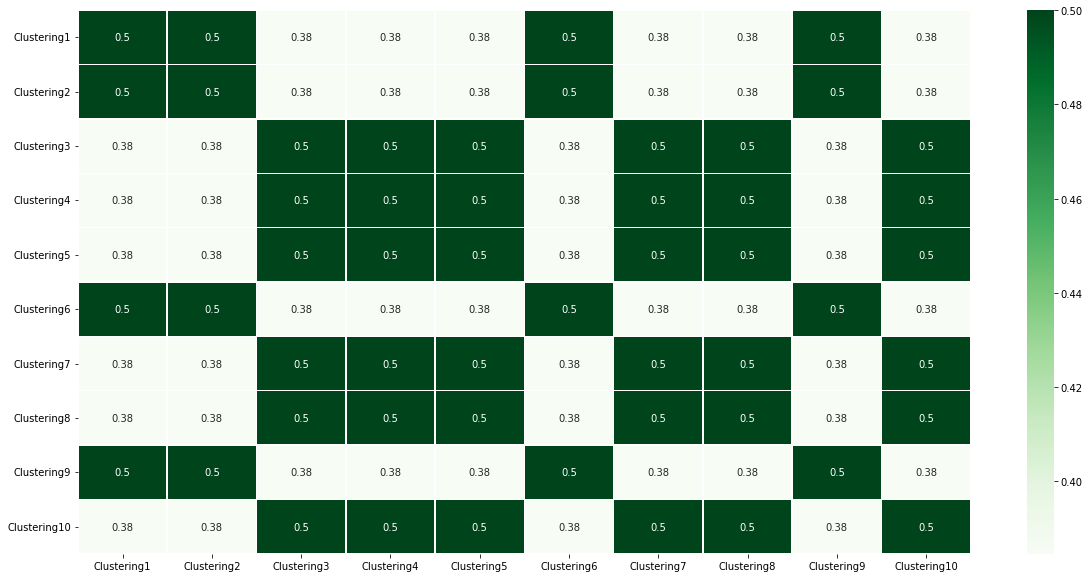

In [37]:
# plotting for better understanding
plt.figure(figsize=(20,10))
sns.heatmap(Sim_Matrix, linewidths=.5, annot=True, cmap='Greens')
plt.show()

In [38]:
cluster[2]

array([1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2,
       1, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1], dtype=int32)

In [39]:
df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan', 'Vietnam', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Name', length=122)

In [40]:
memb = pd.Series(cluster[2], index= df.index)

In [41]:
memb

Name
Afghanistan    1
Albania        2
Algeria        1
Argentina      2
Armenia        2
              ..
Uruguay        0
Uzbekistan     0
Vietnam        2
Zambia         1
Zimbabwe       1
Length: 122, dtype: int32

In [43]:
# still need to understand that peice of code
for key, value in memb.groupby(memb):
  print(key,": ", ", ".join(value.index))

0 :  Australia, Austria, Bahrain, Canada, Denmark, Estonia, Finland, France, Germany, Iceland, Ireland, Luxembourg, Netherlands, New Zealand, Norway, Singapore, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States, Uruguay, Uzbekistan
1 :  Afghanistan, Algeria, Bangladesh, Benin, Burkina Faso, Cambodia, Cameroon, Chad, Ethiopia, Gabon, Ghana, Guinea, Haiti, India, Iraq, Jordan, Kenya, Lebanon, Liberia, Madagascar, Malawi, Mali, Mauritania, Morocco, Myanmar, Nepal, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, Tanzania, Togo, Tunisia, Turkey, Uganda, Zambia, Zimbabwe
2 :  Albania, Argentina, Armenia, Azerbaijan, Belarus, Belgium, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Chile, China, Colombia, Costa Rica, Croatia, Cyprus, Czech Republic, Dominican Republic, Ecuador, El Salvador, Georgia, Greece, Guatemala, Honduras, Hungary, Indonesia, Israel, Italy, Japan, Kazakhstan, Kuwait, Latvia, Libya, Lithuania, Malaysia, Malta, Mexico, Moldova, 

# Centroid Analysis

In [48]:
cluster = [f"cluster {i}" for i in range(3)]
centroids_org = pd.DataFrame(0.0,
                             index= cluster,
                             columns= Xs.columns)

centroids_std = pd.DataFrame(0.0,
                             index= cluster,
                             columns= df.columns)

for i in range(3):
  BM = memb == i
  centroids_org.iloc[i] = Xs[BM].median(axis= 0)
  centroids_std.iloc[i] = df[BM].mean(axis= 0)

centroids_org

,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
cluster 0,7.1950,10.8930,0.937,72.60,0.912,0.074,0.430,0.8040,0.212
cluster 1,4.4530,8.1360,0.688,58.30,0.718,0.013,0.776,0.6480,0.369
cluster 2,5.9995,9.8225,0.877,67.65,0.831,-0.107,0.811,0.7305,0.267


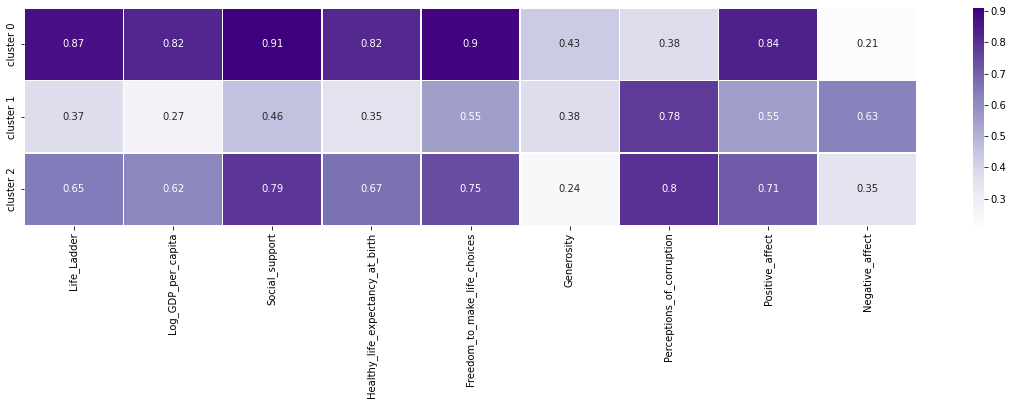

In [55]:
plt.figure(figsize= (20,4))
sns.heatmap(data= centroids_std, linewidth= 0.5, annot= True, cmap= "Purples")
plt.show()

In [56]:
replace_dic = {0:'Happy and crime-ridden',
               1:'Unhappy and crime-ridden',
               2:'Very happy'}
Xs['Cluster'] = memb.replace(replace_dic)
Xs

,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect,Cluster
Name,,,,,,,,,,
Afghanistan,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502,Unhappy and crime-ridden
Albania,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274,Very happy
Algeria,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215,Unhappy and crime-ridden
Argentina,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319,Very happy
Armenia,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430,Very happy
...,...,...,...,...,...,...,...,...,...,...
Uruguay,6.600,9.979,0.933,69.1,0.903,-0.095,0.599,0.889,0.222,Happy and crime-ridden
Uzbekistan,6.154,8.853,0.915,65.4,0.970,0.304,0.511,0.845,0.220,Happy and crime-ridden
Vietnam,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,0.186,Very happy


# Few Analysis

In [58]:
contingency_tbl = pd.crosstab(Xs.Cluster, Xs.Continent)
probablity_tbl = contingency_tbl/ contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="Greys")
plt.show()

AttributeError: ignored